# L’image dans la machine I

## Du pixel aux images - 32M7138

*Printemps 2025 - Université de Genève*

*Adrien Jeanrenaud (adrien.jeanrenaud@unige.ch)*

## Plan du cours

> **Lecture**
> * (Introduction) Dobson, James E.. The Birth of Computer Vision. University of Minnesota Press, 2023.

> **Les bases**
> * Importer
> * Visualiser
> * Enregistrer

> **image = matrice**
> * Une matrice c'est quoi ?
> * La matrice à 1 dimensions: une liste, un tuple, déjà une image
> * La matrice à 2 dimensions: valeurs de gris
> * La matrice à 3 dimensions: les couleurs
> * Les informations de base

> **Référentiels de couleurs**
> * Red Blue Green : RGB
> * Hue Saturation Value : HSV
> * Mais encore

> **Opérations de base**
> * Indexation
> * Transformer en valeur de gris
> * Histogramme de l'image

## Les bases

### Importer

Pour pouvoir visualiser une image avec Python, il faut d'abord donner le chemin de l'image en entrée. Il y a deux manières d'écrire un chemin:
- Chemin absolu
- Chemin relatif

#### Chemin absolu
Le chemin absolu se définit par rapport au dossier "racine" de votre machine (cf. Terminal). C'est-à-dire qu'il part du "premier dossier", ce qu'on appel la racine. Ensuite, le chemin va de dossier en dossier pour arriver là où se trouve le fichier recherché.

**Si vous ne savez pas comme le chemin se nomme, ne vous inquiétez pas: "os" est là pour ça!**

In [ ]:
# Uniquement pour Google Colab

from google.colab import drive
drive.mount('/content/drive')

In [1]:
!pwd

'pwd' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [2]:
# savoir dans quel dossier nous sommes

os.getcwd()

NameError: name 'os' is not defined

In [3]:
# importer os
import os

In [4]:
os.getcwd()

'c:\\Users\\rroll\\Documents\\GitHub\\Du pixel aux images - 32M7138\\Exercices'

#### Chemin relatif


Le chemin relatif, comme son nom l'indique, est relatif à l'endroit depuis lequel je me trouve (le code). Dans quelle partie de ma machine, dans quelle suite de dossier et quel dossier suis-je actuellement ?

**Maintenant, vous savez dans quel dossier vous êtes. Mais comment naviguer?**

In [5]:
# Pour sortir d'un dossier utiliser les ..

path = ".."

In [6]:
os.listdir(path)

['.git', 'Exercices', 'Projet', 'Support_cours']

In [7]:
# Pour sortir d'un dossier et aller dans un autre

path = "../code"

In [8]:
os.listdir(path)

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: '../code'

**On vient de voir la commande "os.listdir()". Cela va nous permettre de lister ce que nous avons dans notre dossier, dont une image!**

In [9]:
# Trouvons une image

os.listdir()

['cours3_2025.ipynb', 'cours_32M7138-main']

In [10]:
# En bash

%ls

 Le volume dans le lecteur C s'appelle OS
 Le num�ro de s�rie du volume est 4A18-61DB

 R�pertoire de c:\Users\rroll\Documents\GitHub\Du pixel aux images - 32M7138\Exercices

15.03.2025  21:22    <DIR>          .
15.03.2025  21:22    <DIR>          ..
15.03.2025  21:22    <DIR>          cours_32M7138-main
15.03.2025  21:19            44�513 cours3_2025.ipynb
               1 fichier(s)           44�513 octets
               3 R�p(s)  35�147�206�656 octets libres


In [11]:
# Mieux encore!

%ls -la

 Le volume dans le lecteur C s'appelle OS
 Le num�ro de s�rie du volume est 4A18-61DB

 R�pertoire de c:\UNINE\Cours\UNIGE\cours_32M7138_introduction_traitement_images\cours\Exercices



Fichier introuvable


**Maintenant qu'on connait notre chemin et notre fichier on peut faire un chemin à notre fichier**

In [11]:
# On peut tout écrire d'un coup, en chemin relatif ou absolu

image = "images/affiche.jpg"

In [12]:
# On peut aussi joindre le chemin et le fichier avec "os"

chemin = "images/"
image = "affiche.jpg"
chemin_image = os.path.join(chemin, image)
print(chemin_image)

images/affiche.jpg


#### Est-ce bien un chemin ?

La mauvaise définition du chemin d'une image est une source d'erreur fréquente. Heureusement il existe des moyens de vérifier 

In [13]:
# d'abord vérifier le chemin au dossier

os.path.isdir("images")

True

In [14]:
# Ensuite vérifier le fichier

image = "images/affiche.jpg"
os.path.isfile(image)

True

In [15]:
# Importer l'image finalement
# on définit le chemin

path = "images/affiche.jpg"

In [16]:
# on vérifie le chemin

os.path.isfile(path)

True

In [28]:
?os.path.isfile

Signature: os.path.isfile(path)
Docstring: Test whether a path is a regular file
File:      c:\users\rroll\appdata\local\programs\python\python310\lib\genericpath.py
Type:      function

In [27]:
# Ensuite on peut importer avec "cv2.imread()"

import cv2

?cv2.imread

Docstring:
imread(filename[, flags]) -> retval
.   @brief Loads an image from a file.
.   
.   @anchor imread
.   
.   The `imread` function loads an image from the specified file and returns OpenCV matrix. If the image cannot be
.   read (because of a missing file, improper permissions, or unsupported/invalid format), the function
.   returns an empty matrix.
.   
.   Currently, the following file formats are supported:
.   
.   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
.   -   GIF files - \*.gif (always supported)
.   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
.   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
.   -   Portable Network Graphics - \*.png (see the *Note* section)
.   -   WebP - \*.webp (see the *Note* section)
.   -   AVIF - \*.avif (see the *Note* section)
.   -   Portable image format - \*.pbm, \*.pgm, \*.ppm, \*.pxm, \*.pnm (always supported)
.   -   PFM files - \*.pfm (see the *Note* section)
.   -   Sun rasters - \*.sr, \

In [30]:
# une autre librairie
from PIL import Image

?Image.open

Signature:
Image.open(
    fp: 'StrOrBytesPath | IO[bytes]',
    mode: "Literal['r']" = 'r',
    formats: 'list[str] | tuple[str, ...] | None' = None,
) -> 'ImageFile.ImageFile'
Docstring:
Opens and identifies the given image file.

This is a lazy operation; this function identifies the file, but
the file remains open and the actual image data is not read from
the file until you try to process the data (or call the
:py:meth:`~PIL.Image.Image.load` method).  See
:py:func:`~PIL.Image.new`. See :ref:`file-handling`.

:param fp: A filename (string), os.PathLike object or a file object.
   The file object must implement ``file.read``,
   ``file.seek``, and ``file.tell`` methods,
   and be opened in binary mode. The file object will also seek to zero
   before reading.
:param mode: The mode.  If given, this argument must be "r".
:param formats: A list or tuple of formats to attempt to load the file in.
   This can be used to restrict the set of formats checked.
   Pass ``None`` to try all su

In [31]:
# on définit notre objet image

image = cv2.imread(path)

#### Visualiser

In [32]:
# Pour l'instant ça nous parle peu, on verra ce que cela signifie dans un instant

image

array([[[ 33,  49, 185],
        [ 15,  33, 164],
        [ 15,  37, 162],
        ...,
        [ 31,   9, 192],
        [ 31,   9, 192],
        [ 33,  11, 194]],

       [[ 24,  39, 171],
        [ 20,  39, 168],
        [ 24,  43, 170],
        ...,
        [ 30,   8, 191],
        [ 30,   8, 191],
        [ 32,  10, 193]],

       [[ 29,  46, 173],
        [ 25,  42, 169],
        [ 28,  44, 174],
        ...,
        [ 30,   7, 193],
        [ 30,   7, 193],
        [ 32,   9, 195]],

       ...,

       [[ 34,  75, 198],
        [ 29,  69, 195],
        [ 27,  68, 194],
        ...,
        [ 17,  44, 188],
        [ 23,  44, 196],
        [ 32,  49, 206]],

       [[ 32,  71, 199],
        [ 30,  69, 198],
        [ 31,  71, 200],
        ...,
        [ 21,  44, 196],
        [ 26,  45, 204],
        [ 33,  48, 210]],

       [[ 30,  69, 201],
        [ 29,  68, 200],
        [ 31,  70, 202],
        ...,
        [ 28,  46, 207],
        [ 29,  45, 212],
        [ 30,  46, 213]]

In [33]:
# importer la librairie

import matplotlib.pyplot as plt

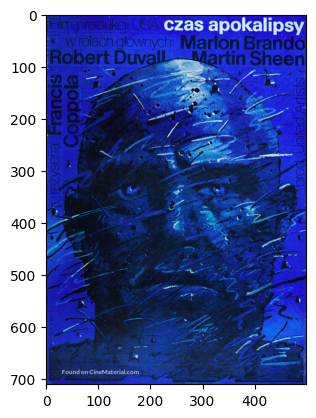

In [35]:
# simplement

plt.imshow(image)
plt.show()

<div class="alert alert-block alert-danger">
<b>Oups, on a un petit problème de couleurs non?</b>.
</div>

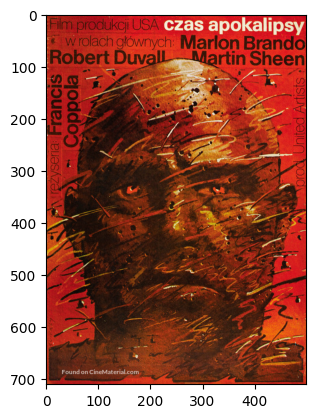

In [36]:
# Il suffit de changer l'ordre à nouveaux
# On passe du BlueGreenRed au RedBlueGreen, mais nous verrons ce que ça veut dire dans un instant

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

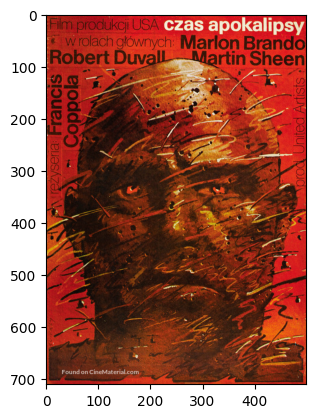

In [37]:
# avec PIL, pas besoin de conversion

image2 = Image.open(path)
plt.imshow(image2)
plt.show()

In [38]:
#### Enregistrer

In [39]:
# Avec PIL

image2.save('nouvelle_image.png')

<div class="alert alert-block alert-warning">
<b>Exercice</b>: à partir du code ci-dessous, téléchargez une image d'après sont lien (URL) et visualisez là.</div>

## image = matrice

### Une matrice c'est quoi ?

Une image numérique prend la forme d'une **matrice** : une matrice est un tableau de points caractérisé par des **dimensions** (par exemple, la largeur et la hauteur). Chaque point, chaque case comporte une **valeur** qui représente de l'information. 

D'une manière générale, une image matricielle est représenté par une grille dont la hauteur et la largeur indiquent le nombre de pixels et la taille de l'image, alors que chaque point renvoie à une valeur de couleur (valeurs de gris pour les images en 2D et couleurs pour les images 3D)

<img src="https://logodix.com/logo/2067282.png" title="array_1"/>

### La matrice à 1 dimensions: une liste, un tuple, déjà une image

Une matrice à 1D prend la forme d'une liste. Par rapport à une image, c'est comme si notre image (avec une hauteur et une largeur) était réduite à sa largeur. 

Dans certains cas, il est possible qu'une image en 2D soit réduite à 1D afin d'avoir un objet (une liste à 1D) plus manipulable sans toutefois perdre de l'information (par rapport à l'image 2D)

In [40]:
# Une matrice à 1D
# La fonction np.array() permet de créer un tableau de valeurs (array)
# une image est un array

import numpy as np

a = np.array([0,1,2,3,4,5,6,7,8,9])
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [41]:
a.shape

(10,)

### La matrice à 2 dimensions: valeurs de gris

Une image, comme nous la voyons, se caractérise par une hauteur et une largeur, donc par deux dimensions. Ces deux dimensions forment spatialement l'image et chaque point contenu dans cette grille à une valeur. Cette valeur, dans une image 2D, se réfère à une valeur de gris comprise entre 0 et 255.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1386%2F1*bV7S0zACdidh11ikjYpLpQ.png&f=1&nofb=1&ipt=fdde33a6c1082d8f4d5e278d4eb9295103a87ed0ae39e89bce8081c15e12ff6f&ipo=images" title="array_2"/>

Les valeurs de gris vont de 0 à 255, c'est à dire que l'information est représentée par 256 valeurs différentes. Les valeurs de gris dépendent de la manière dont elles sont encodées ; plus généralement, il y a 256 valeurs de 0 (noir) à 255 (blanc).

In [42]:
# Une matrice à 2D
# La fonction np.array() permet de créer un tableau (array) en 2D, pour cela il suffit de suivre la logique:
# la première paire de [] forme la matrice et 
# à l'intérieur chaque [] forme une ligne dans la matrice, et
# à l'inétrieur de ces [] chaque valeur est un point qui dans une image est une valeur de gris

b = np.array([[0,1,2],[3,4,5],[6,7,8],[9,10,11]])
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


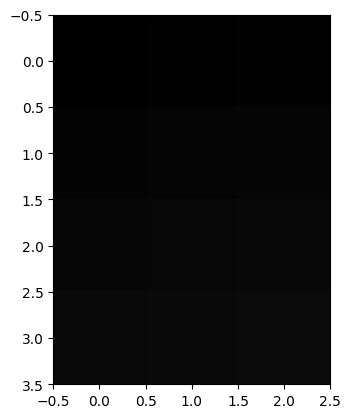

In [43]:
# Nous pouvons faire un teste pour visualiser notre matrice et ses valeurs de gris

plt.imshow(b, cmap="gray", vmin=0, vmax=255) # l'option cmpa="gray" permet de visualiser les valeurs de gris en spéficiant les bornes (entre 0 et 255)
plt.show()

**Les valeurs choisises sont toutes très proches de 0, on ne voit pas très bien les variations: essayons à nouveau!**

In [44]:
# Un nouvel array à 2D

b2 = np.array([[0,112,2],[3,224,5],[136,7,8],[119,101,110]])
print(b2)

[[  0 112   2]
 [  3 224   5]
 [136   7   8]
 [119 101 110]]


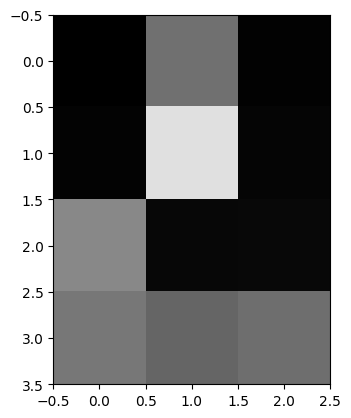

In [45]:
# Visualiser notre matrice et ses valeurs de gris

plt.imshow(b2, cmap="gray", vmin=0, vmax=255)
plt.show()

### La matrice à 3 dimensions: les couleurs

Contrairement à ce que nous voyons sur notre écran, une image de couleurs se déploie numériquement sur trois dimensions. 

Alors que les deux premières dimensions sont la hauteur et la largeur, la troisième dimension et celle des valeurs de couleurs. Tout comme pour une image en 2D, chaque valeur du tableau est encodée entre 0 et 255, mais c'est l'addition des valeurs des trois matrices qui donne les couleurs et ses nuances.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fbrohrer.github.io%2Fimages%2Fimage_processing%2Frgb_arrays.png&f=1&nofb=1&ipt=d2b56511f6feae071ef2f5d795df4c23076cdc90d482450f89337c061f06cd43&ipo=images" title="array_3"/>

In [46]:
# Une matrice à 3D
# La fonction np.array() permet de créer un tableau (array) en 3D, pour cela il suffit de suivre la logique:
# la première paire de [] forme la matrice et 
# à l'intérieur chaque [] forme une ligne dans la matrice, et
# à l'intérieur de ces [] chaque [] forme un triplet de valeurs qui s'étend dans la troisième dimension

c = np.array([[[123,11,22],
               [200,24,5]],
               [[60,70,80],
              [90,100,11]],
               [[120,13,140],
               [15,160,170]],
                 [[22,210,0],
                 [30,42,100]]])
print(c)

[[[123  11  22]
  [200  24   5]]

 [[ 60  70  80]
  [ 90 100  11]]

 [[120  13 140]
  [ 15 160 170]]

 [[ 22 210   0]
  [ 30  42 100]]]


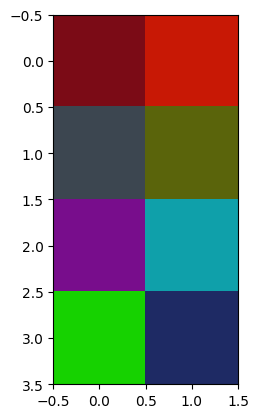

In [47]:
# Visualiser notre matrice et ses couleurs
# Jouer avec les valeurs de votre matrice afin de voir intuitivement comment se forment les couleurs

plt.imshow(c)
plt.show()

### Les informations de base

Il existe quelques fonction de base en Python afin de comprendre quel type d'objet nous avons.

In [48]:
# Est-ce une image ?

type(image)

numpy.ndarray

In [49]:
# Est-ce une image ?

type(image2)

PIL.JpegImagePlugin.JpegImageFile

In [50]:
# Est-ce une image ?

type(b)

numpy.ndarray

In [51]:
# Quelles dimensions

image.shape

(710, 500, 3)

In [52]:
# Quelles dimensions

a.shape

(10,)

## Référentiels de couleurs

Il existe différentes manière d'encoder les couleurs d'une image numérique, mais la manière la plus courante consiste à faire l'addition de trois couleurs - rouge, vert, bleu - pour obtenir toutes les autres couleurs. Ainsi, nous parlons d'images en RGB (Red, Green, Blue). 

L'encodage des couleurs est la source du problème dans l'importation des images avec OpenCV (voir ci-dessus). En effet, nous visualisons nos images avec une suite RGB alors qu'OpenCV importe les images avec une suite BGR.

### Red Blue Green : RGB


<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdncontribute.geeksforgeeks.org%2Fwp-content%2Fuploads%2FPixel.jpg&f=1&nofb=1&ipt=7cb426810b518f590b1c3e809c55876ab2c8530ec4a3559fd40abebb754ff8fb&ipo=images" title="array_color"/>

Il s'agit simplement d'addtioner les couleurs pour arriver au blanc, et de les soustraires pour arriver au noir.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fthumbs.dreamstime.com%2Fb%2Fadditive-color-mixing-scheme-rgb-colors-theory-151820794.jpg&f=1&nofb=1&ipt=1a310be6ef33188c84014c51bb23af2cd39de0b1a2e1b82c39a3217087c52752&ipo=images" title="array_color2"/>

[[[255   0   0]
  [  0 255   0]
  [  0   0 255]]

 [[255   0 255]
  [  0 255 255]
  [255 255   0]]]


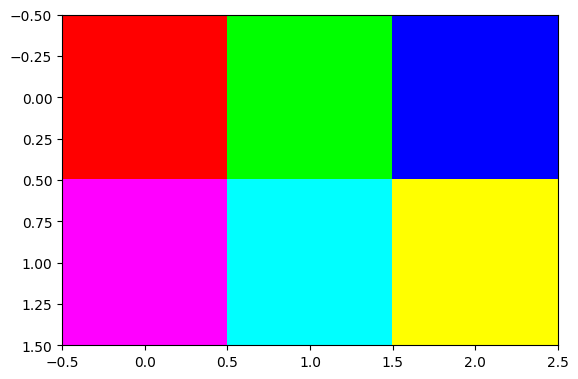

In [53]:
# Reprenons notre matrice ci-dessus et mettons y les triplets des couleurs de base

c2 = np.array([[[255,0,0],
               [0,255,0],
               [0,0,255]],
              [[255,0,255],
               [0,255,255],
               [255,255,0]]])
print(c2)

plt.imshow(c2)
plt.show()

[[[255   0   0]
  [  0 255   0]
  [  0   0 255]]

 [[255   0 255]
  [  0 255 255]
  [255 255   0]]]


Text(0.5, 1.0, 'Blue')

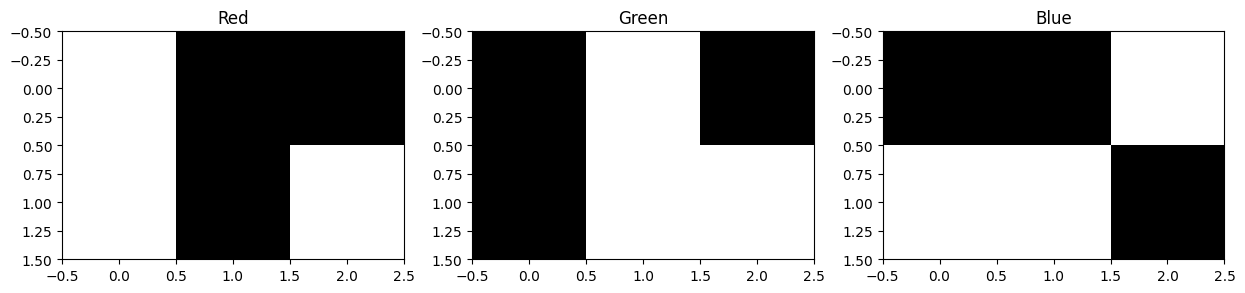

In [54]:
# on peut voir chaque matrice séparément grace à l'indexation
# les zones claires indiques la présence de la couleur

plt.figure(figsize=(15,10))
print(c2)
plt.subplot(131); plt.imshow(c2[:,:,0], cmap="gray"); plt.title("Red")
plt.subplot(132); plt.imshow(c2[:,:,1], cmap="gray"); plt.title("Green")
plt.subplot(133); plt.imshow(c2[:,:,2], cmap="gray"); plt.title("Blue")

In [55]:
red = c2.copy()
red

array([[[255,   0,   0],
        [  0, 255,   0],
        [  0,   0, 255]],

       [[255,   0, 255],
        [  0, 255, 255],
        [255, 255,   0]]])

In [56]:
red.shape

(2, 3, 3)

In [59]:
red[:,:,1] = 0
red

array([[[255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]]])

In [58]:
red.shape

(2, 3, 3)

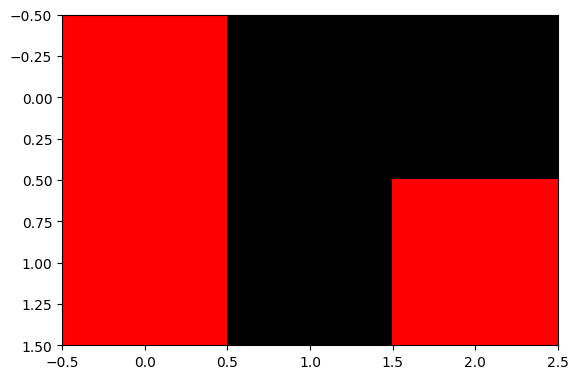

In [57]:
# Visualiser le canal rouge
# Faire une copie de l'image et mettre les deux autres cannaux à 0 (en noir)

red = c2.copy()
red[:,:,1] = red[:,:,2] = 0
plt.imshow(red)
plt.show()

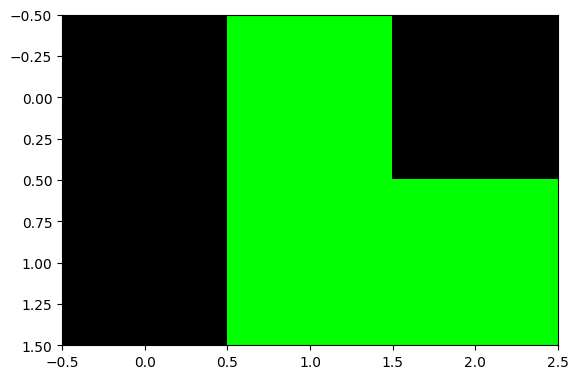

In [60]:
# Visualiser le canal vert
# Faire une copie de l'image et mettre les deux autres cannaux à 0 (en noir)

green = c2.copy()
green[:,:,0] = green[:,:,2] = 0 
plt.imshow(green)
plt.show()

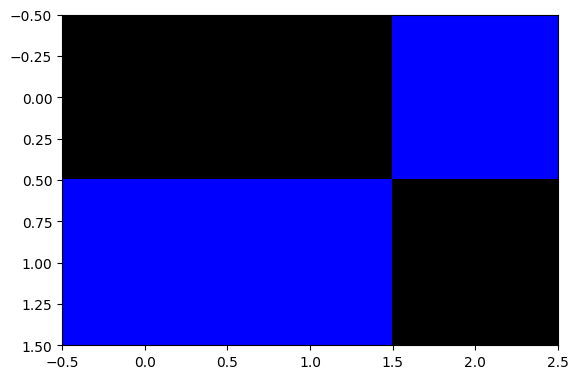

In [61]:
# Visualiser le canal bleu
# Faire une copie de l'image et mettre les deux autres cannaux à 0 (en noir)

blue = c2.copy()
blue[:,:,0] = blue[:,:,1] = 0 
plt.imshow(blue)
plt.show()

**Faisons la même chose avec notre image!**

(710, 500, 3)


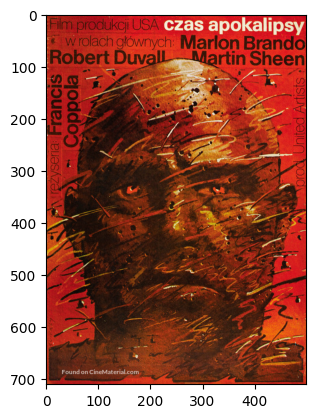

In [62]:
print(image.shape)

plt.imshow(image)
plt.show()

[[[185  49  33]
  [164  33  15]
  [162  37  15]
  ...
  [192   9  31]
  [192   9  31]
  [194  11  33]]

 [[171  39  24]
  [168  39  20]
  [170  43  24]
  ...
  [191   8  30]
  [191   8  30]
  [193  10  32]]

 [[173  46  29]
  [169  42  25]
  [174  44  28]
  ...
  [193   7  30]
  [193   7  30]
  [195   9  32]]

 ...

 [[198  75  34]
  [195  69  29]
  [194  68  27]
  ...
  [188  44  17]
  [196  44  23]
  [206  49  32]]

 [[199  71  32]
  [198  69  30]
  [200  71  31]
  ...
  [196  44  21]
  [204  45  26]
  [210  48  33]]

 [[201  69  30]
  [200  68  29]
  [202  70  31]
  ...
  [207  46  28]
  [212  45  29]
  [213  46  30]]]


Text(0.5, 1.0, 'Blue')

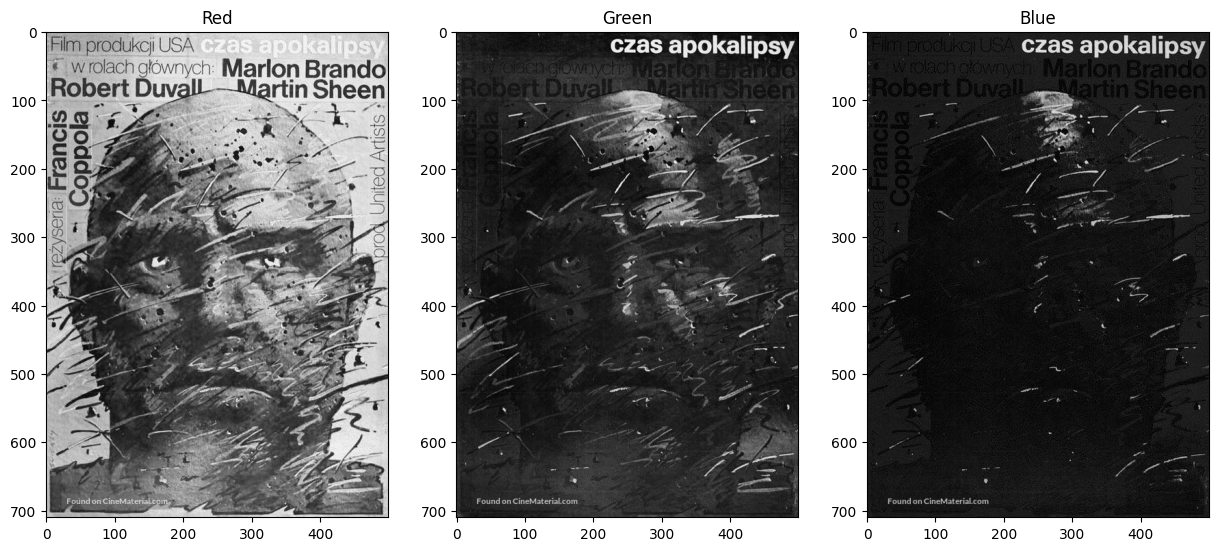

In [63]:
# on peut voir chaque matrice séparément grace à l'indexation

plt.figure(figsize=(15,10))
print(image)
plt.subplot(131); plt.imshow(image[:,:,0], cmap="gray"); plt.title("Red")
plt.subplot(132); plt.imshow(image[:,:,1], cmap="gray"); plt.title("Green")
plt.subplot(133); plt.imshow(image[:,:,2], cmap="gray"); plt.title("Blue")

### Hue Saturation Value : HSV

L'espace HSV, en français TSV, comprend Hue (Teinte), Saturation et Valeur. L'intérêt de cet espace de couleur est que la couleur est encodée sur un canal uniquement (Teinte). La saturation correspond à l'intensité de la couleur, plus elle sera faible plus la couleur sera fade. La valeur correspond à la brillance, plus elle sera faible plus la couleur sera sombre.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fres.cloudinary.com%2Fpracticaldev%2Fimage%2Ffetch%2Fs--bY6KnFCr--%2Fc_limit%252Cf_auto%252Cfl_progressive%252Cq_auto%252Cw_880%2Fhttps%3A%2F%2Fthepracticaldev.s3.amazonaws.com%2Fi%2F3tffy0gdkf1471xg6mhi.jpeg&f=1&nofb=1&ipt=49377950004c804b3e40029c9dd8f89711a2b84bd72d38afdf5711be5d62e40b&ipo=images" title="array_hsv"/>

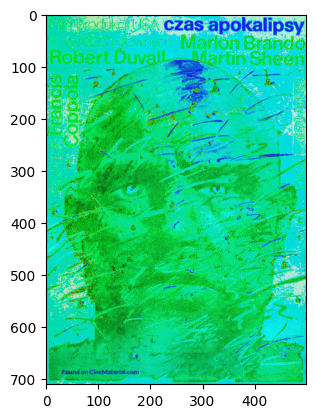

In [64]:
# Modifier puis visualiser en HSV

hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv, cmap='hsv')
plt.show()

Text(0.5, 1.0, 'Value')

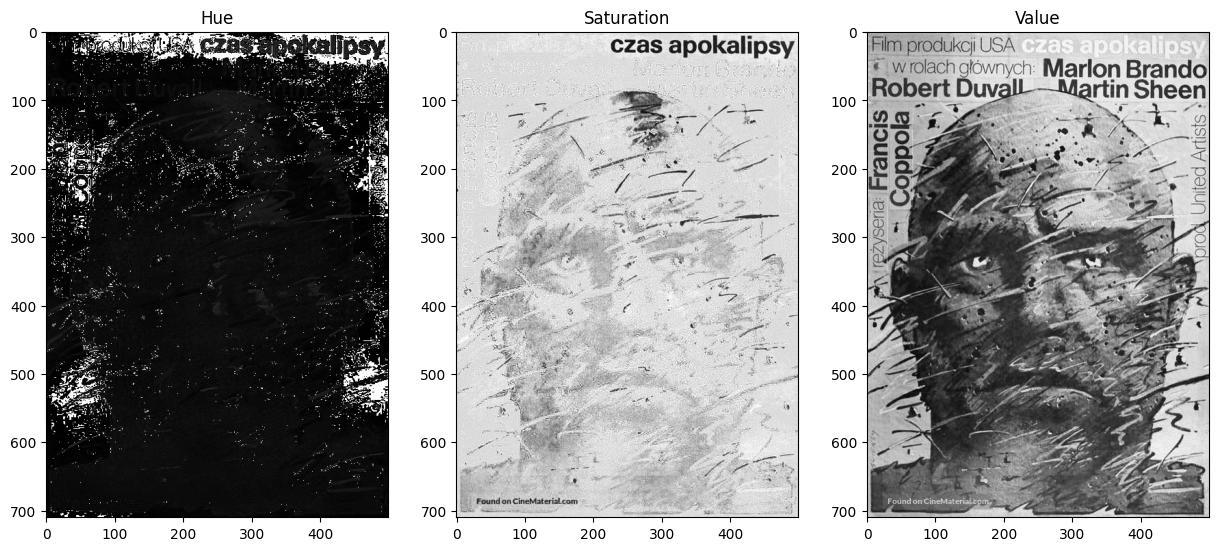

In [65]:
# voyons chaque canal

plt.figure(figsize=(15,10))
plt.subplot(131); plt.imshow(hsv[:,:,0], cmap="gray"); plt.title("Hue");
plt.subplot(132); plt.imshow(hsv[:,:,1], cmap="gray"); plt.title("Saturation")
plt.subplot(133); plt.imshow(hsv[:,:,2], cmap="gray"); plt.title("Value")

Text(0.5, 1.0, 'Image de base')

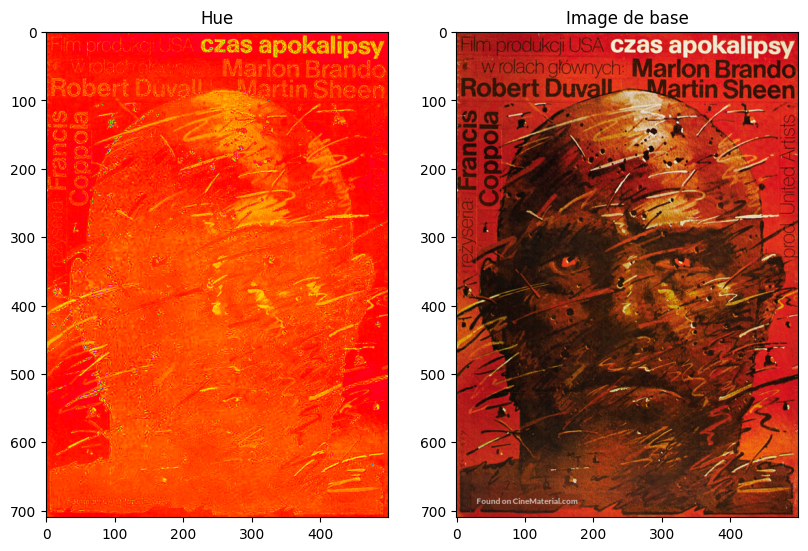

In [66]:
plt.figure(figsize=(15,10))
plt.subplot(131); plt.imshow(hsv[:,:,0], cmap="hsv"); plt.title("Hue");
plt.subplot(132); plt.imshow(image); plt.title("Image de base")

### Mais encore

Il existe différentes manières de décrire et d'encoder les couleurs dans les images.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/SubtractiveColor.svg/1920px-SubtractiveColor.svg.png" title="cmy"/>
<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2F4.bp.blogspot.com%2F_lNzlqVMcIj8%2FS883k71zk3I%2FAAAAAAAABvw%2F2sDaMacB4E8%2Fs1600%2FBasic%2BGamut%2Bgraphic%2BLab.jpg&f=1&nofb=1&ipt=05d18ee527a7b2c647f0a549f02f28e26a221b3990f7b6c646b3e6094f8ca0e7&ipo=images" title="clab"/>

Pour aller plus loin: https://en.wikipedia.org/wiki/List_of_color_spaces_and_their_uses

## Opérations de base

### Indexation

Ce type de manipulation permets de nous déplacer sur une image, de cibler une dimensions et d'autres choses que nous verrons pas la suite.

#### L'image à 1D: rappel des listes

Une image à 1D s'apparente à une liste. On a déjà vu les listes, alors faisons un petit rappel

In [67]:
# Une matrice à 1D
# La fonction np.array() permet de créer un tableau (array)

a = np.array([0,1,2,3,4,5,6,7,8,9])
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [68]:
# Pour accéder à une valeur on utilise les [] pour déterminer une position (et non la valeur en elle-même!)

a[1]

1

In [69]:
# Mais en Python, la première position commence à 0

a[0]

0

In [70]:
# On peut aussi prendre plusieurs valeurs
# a[début:fin[ (non compris)

a[0:4]

array([0, 1, 2, 3])

In [ ]:
# On peut donner un ensemble après une certaine position
# a[début: jusqu'à la fin] (compris)

a[4:]

In [ ]:
# On peut donner un ensemble jusqu'à une certaine position
# a[depuis le début: fin[ (non compris)

a[:4]

In [ ]:
# On peut partir depuis la dernière position
# a[début: moins les X dernières valeurs] 

a[:-1]

In [ ]:
# On peut donner un ensemble par la négative
# a[les X dernières valeurs:] 

a[-3:]

In [ ]:
# On peut même demander des ensembles plus spécifiques, par exemple prendre une valeur sur deux
# a[début inclu: fin inclu: pas entre les valeurs] 

a[ : :2]

#### L'image en valeurs de gris: 2D

Sur une image à deux dimensions, l'indexation permet d'acceder aux valeurs du tableau en se déplaçant sur la hauteur et la largeur, entre lignes et colonnes.

In [ ]:
# Créer une image 2D

b = np.array([[0,1,2],[3,4,5],[6,7,8],[9,10,11]])
print(b)

In [ ]:
# Si l'on part de la logique à 1D
# un [] permet d'accéder à la ligne

b[0]

In [ ]:
# Accéder à plusieurs lignes

b[0:2]

In [ ]:
# L'utilisation de la virgule permet de passer à une autre dimension
# Accéder à la colonne

b[:,0]

In [ ]:
# Accéder à plusieurs colonnes

b[:,0:2]

In [ ]:
# Accéder à plusieurs valeurs sur la ligne
# b[ligne, début colonne:fin] 

b[0,1:3]

In [ ]:
# Accéder à plusieurs valeurs sur plusieurs lignes
# b[ligne départ:ligne arrivée non-incluse, début colonne: fin non incluse] 

b[0:2,1:3]

### 3D: les images couleurs

L'intérêt de l'indexation d'une image à 3D est l'accès aux valeurs qui, dans le troisième dimension, forment la couleur.

In [ ]:
c = np.array([[[255,0,0],
               [0,255,0],
               [0,0,255]],
              [[255,0,255],
               [0,255,255],
               [255,255,0]]])
print(c)

plt.imshow(c)
plt.show()

In [ ]:
# Si l'on part de la logique à 1D
# un [] permet d'accéder à la ligne

c[0]

In [ ]:
# Sur cette ligne on peut accéder aux deux premières valeurs par exemple

c[0,:2]

In [ ]:
# Et sur cette ligne à deux valeurs on peut accéder à la première dimension (au rouge par exemple)

c[0,:3, 0]

In [ ]:
# On prend la première colonne

c[:,:1,:]

In [ ]:
# On peut aussi simplement prendre la "couche" qui contient la couleur vert

c[:,:, 1]

In [ ]:
plt.imshow(c[:,:, 1], cmap="gray")
plt.show()

### Transformation en valeurs de gris

In [ ]:
# Convertir en niveaux de gris
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap="gray")
plt.show()


### Histogramme

Montre la répartition des niveaux d'intensité (ou de couleur) d'une image. Il permet d'évaluer rapidement la luminosité, le contraste et la dynamique de l'image. Par exemple, un histogramme concentré à gauche indique une image sombre, tandis qu'un histogramme étalé sur toute la plage montre une bonne répartition des tons, souvent synonyme d'une image bien exposée

In [ ]:
# Calculer l'histogramme des niveaux de gris
histogram = cv2.calcHist([image_gray], [0], None, [256], [0, 256])

# Affichage des résultats
plt.figure(figsize=(12, 6))

# 1. Image en couleur
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convertir BGR en RGB pour un affichage correct
plt.title("Image en couleurs")
plt.axis('off')

# 2. Image en niveaux de gris
plt.subplot(1, 3, 2)
plt.imshow(image_gray, cmap='gray')
plt.title("Image en niveaux de gris")
plt.axis('off')

# 3. Histogramme des niveaux de gris
plt.subplot(1, 3, 3)
plt.plot(histogram, color='black')
plt.title("Histogramme des niveaux de gris")
plt.xlabel("Niveaux de gris")
plt.ylabel("Nombre de pixels")

# Afficher les figures
plt.tight_layout()
plt.show()


In [ ]:
# Séparer les canaux Bleu, Vert, Rouge
b_channel, g_channel, r_channel = cv2.split(image)
channels = [b_channel, g_channel, r_channel]
colors = ['blue', 'green', 'red']

# Créer une figure pour affichage
plt.figure(figsize=(12, 8))

for i, (channel, color) in enumerate(zip(channels, colors)):
    # Calculer l'histogramme pour le canal
    histogram = cv2.calcHist([channel], [0], None, [256], [0, 256])

    # Afficher le canal
    plt.subplot(3, 2, i * 2 + 1)
    plt.imshow(channel, cmap="gray")
    plt.title(f"Canal {color.capitalize()}")
    plt.axis('off')

    # Afficher l'histogramme correspondant
    plt.subplot(3, 2, i * 2 + 2)
    plt.plot(histogram, color=color)
    plt.title(f"Histogramme du canal {color.capitalize()}")
    plt.xlabel("Niveau d'intensité")
    plt.ylabel("Nombre de pixels")
    plt.grid(alpha=0.3)

# Ajustement de l'affichage
plt.tight_layout()
plt.show()
